# Importing Stuff

In [1]:
import sys
import os

# Get the absolute path of the project root directory
project_root = os.path.abspath(os.path.join(os.getcwd(), "../../"))


# Add the project root directory to the Python path
sys.path.append(project_root)

In [2]:
import pandas as pd

project_root = os.path.abspath(os.path.join(os.getcwd(), "../../"))

# Define the path to the data directory
data_dir = os.path.join(project_root, 'data')

# Example: Access a specific data file in the data directory
data_file_path = os.path.join(data_dir, 'MAR_per_OAR_for_patients.csv')
df = pd.read_csv(data_file_path)

df['Targ'] = df['MAR'] > 3.5
data = df[['95HD', 'VolDice', 'SurfDist','JaccardIndex', 'APL', 'FNPL', 'FNV', 'Targ', 'OAR', 'patient', 'MAR']]


# Run Analysis witout a config file

In [5]:
from AutoML.analyzer import AutoMLAnalyzer

analyzer = AutoMLAnalyzer(data, target_variable='Targ', output_dir='./analysis_output')

analyzer.run()

Config file not found, used a heuristic to define categorical and continuous columns. Please review!
Categorical: ['OAR', 'patient', 'Targ']

Continuous: ['JaccardIndex', 'MAR', 'SurfDist', '95HD', 'APL', 'VolDice', 'FNV', 'FNPL']

Config file not found, checking for outliers in categorical variables...
  - No Outliers found in OAR
  - Outliers found in patient: ['RADCURE-3521: 2 out of 380', 'RADCURE-3689: 2 out of 380', 'RADCURE-3929: 2 out of 380', 'RADCURE-3425: 2 out of 380', 'RADCURE-2976: 2 out of 380', 'RADCURE-3698: 2 out of 380']
  - No Outliers found in Targ
Applying changes from config file...

╒═════════════════════════╤════════════════╤═══════════╤═════════════════╕
│                         │                │ Missing   │ Overall         │
╞═════════════════════════╪════════════════╪═══════════╪═════════════════╡
│ n                       │                │           │ 380             │
├─────────────────────────┼────────────────┼───────────┼─────────────────┤
│ JaccardIn

# Run with edited config.yaml
Here I moved patient from categorical to other

In [6]:
import yaml
import pprint 

pp = pprint.PrettyPrinter(indent=4)

with open('analysis_output/config.yaml', 'r') as f:
    config = yaml.safe_load(f)

print('\nGENERATED CONFIG:\n')
pp.pprint(config)

config['columns']['categorical'].remove('patient')
config['mapping'].pop('patient')
config['columns']['other'].append('patient')

print('\nUPDATED CONFIG:\n')
pp.pprint(config)

if not os.path.exists('./analysis_updated'):
    os.mkdir('./analysis_updated')
with open('analysis_updated/config.yaml', 'w') as f:
    yaml.dump(config, f)



GENERATED CONFIG:

{   'columns': {   'categorical': ['OAR', 'patient', 'Targ'],
                   'continuous': [   'JaccardIndex',
                                     'MAR',
                                     'SurfDist',
                                     '95HD',
                                     'APL',
                                     'VolDice',
                                     'FNV',
                                     'FNPL'],
                   'date': [],
                   'other': []},
    'mapping': {   'OAR': {   'Acoustic_L': '',
                              'Acoustic_R': '',
                              'BrachialPlex_L': '',
                              'BrachialPlex_R': '',
                              'Brainstem': '',
                              'Esophagus': '',
                              'Eye_L': '',
                              'Eye_R': '',
                              'Larynx': '',
                              'Lens_L': '',
             

In [7]:
analyzer = AutoMLAnalyzer(data, target_variable='Targ', output_dir='./analysis_updated', config_file='./analysis_updated/config.yaml')

analyzer.run()

Applying changes from config file...

╒═════════════════════════╤════════════════╤═══════════╤═════════════════╕
│                         │                │ Missing   │ Overall         │
╞═════════════════════════╪════════════════╪═══════════╪═════════════════╡
│ n                       │                │           │ 380             │
├─────────────────────────┼────────────────┼───────────┼─────────────────┤
│ JaccardIndex, mean (SD) │                │ 0         │ 0.7 (0.2)       │
├─────────────────────────┼────────────────┼───────────┼─────────────────┤
│ MAR, mean (SD)          │                │ 0         │ 3.7 (0.7)       │
├─────────────────────────┼────────────────┼───────────┼─────────────────┤
│ SurfDist, mean (SD)     │                │ 0         │ 1.3 (1.9)       │
├─────────────────────────┼────────────────┼───────────┼─────────────────┤
│ 95HD, mean (SD)         │                │ 0         │ 6.2 (21.9)      │
├─────────────────────────┼────────────────┼───────────┼──────

# Run trainer

Applying mrmr for feature reduction


100%|██████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 161.29it/s]
No path specified. Models will be saved in: "AutogluonModels/ag-20240723_143933"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.11.9
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #188-Ubuntu SMP Wed Jan 10 09:51:01 UTC 2024
CPU Count:          4
Memory Avail:       3.35 GB / 7.61 GB (44.1%)
Disk Space Avail:   596.30 GB / 915.32 GB (65.1%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_qua

Features kept: ['APL' 'VolDice']


Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20240723_143933"
Train Data Rows:    304
Train Data Columns: 2
Label Column:       Targ
Problem Type:       binary
Preprocessing data ...
Selected class <--> label mapping:  class 1 = True, class 0 = False
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    3429.54 MB
	Train Data (Original)  Memory Usage: 0.00 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerator...
	Types of features in original data (raw dtype, special dty


Model Leaderbord
----------------
╒════╤═════════════════════╤═════════════╤═══════════════╕
│    │ model               │   score_val │ eval_metric   │
╞════╪═════════════════════╪═════════════╪═══════════════╡
│  0 │ WeightedEnsemble_L2 │    0.732222 │ roc_auc       │
├────┼─────────────────────┼─────────────┼───────────────┤
│  1 │ KNeighborsUnif      │    0.708889 │ roc_auc       │
├────┼─────────────────────┼─────────────┼───────────────┤
│  2 │ RandomForestEntr    │    0.685556 │ roc_auc       │
├────┼─────────────────────┼─────────────┼───────────────┤
│  3 │ RandomForestGini    │    0.682222 │ roc_auc       │
├────┼─────────────────────┼─────────────┼───────────────┤
│  4 │ CatBoost            │    0.676667 │ roc_auc       │
├────┼─────────────────────┼─────────────┼───────────────┤
│  5 │ ExtraTreesEntr      │    0.676667 │ roc_auc       │
├────┼─────────────────────┼─────────────┼───────────────┤
│  6 │ ExtraTreesGini      │    0.675556 │ roc_auc       │
├────┼───────────────

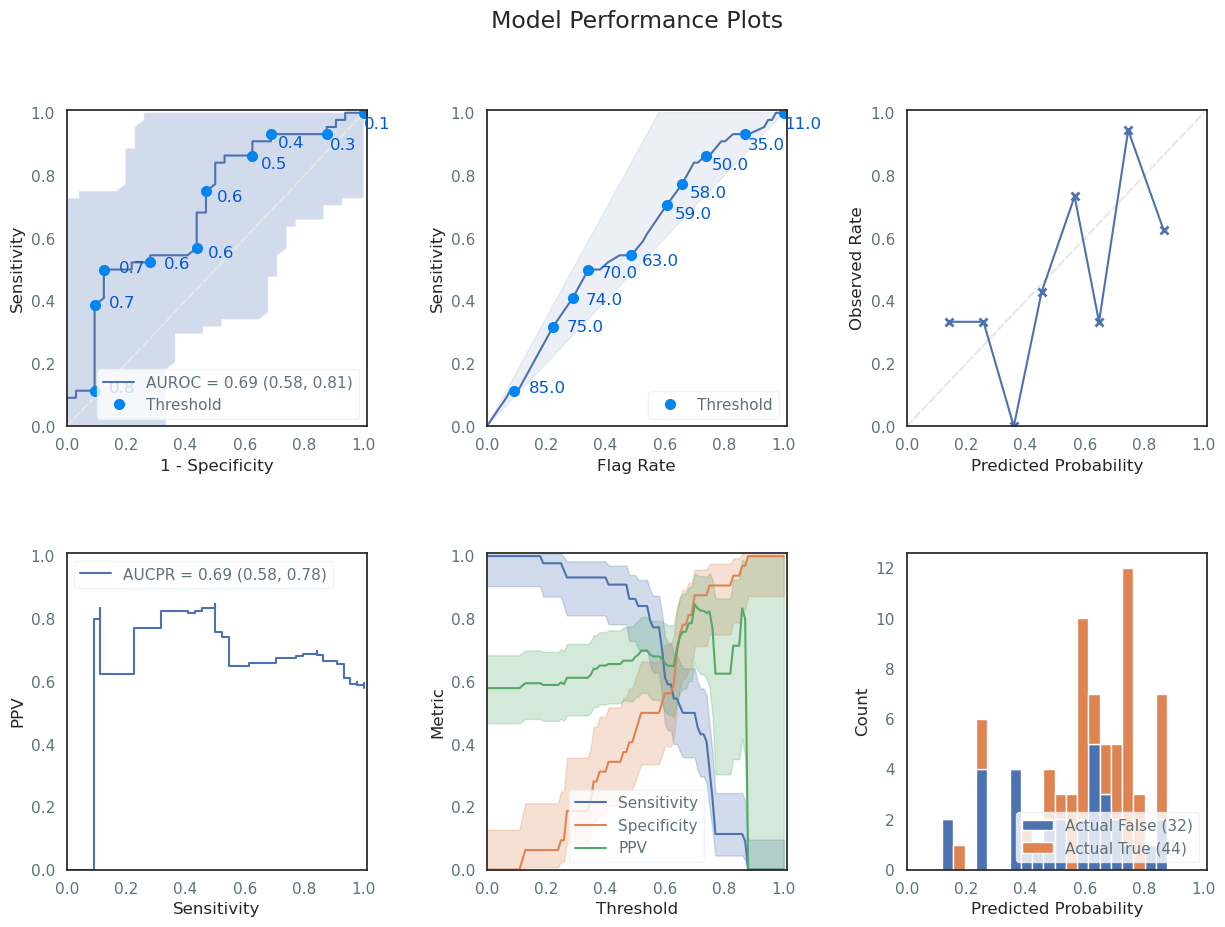

Computing feature importance via permutation shuffling for 2 features using 76 rows with 5 shuffle sets...
	1.12s	= Expected runtime (0.22s per shuffle set)
	0.42s	= Actual runtime (Completed 5 of 5 shuffle sets)


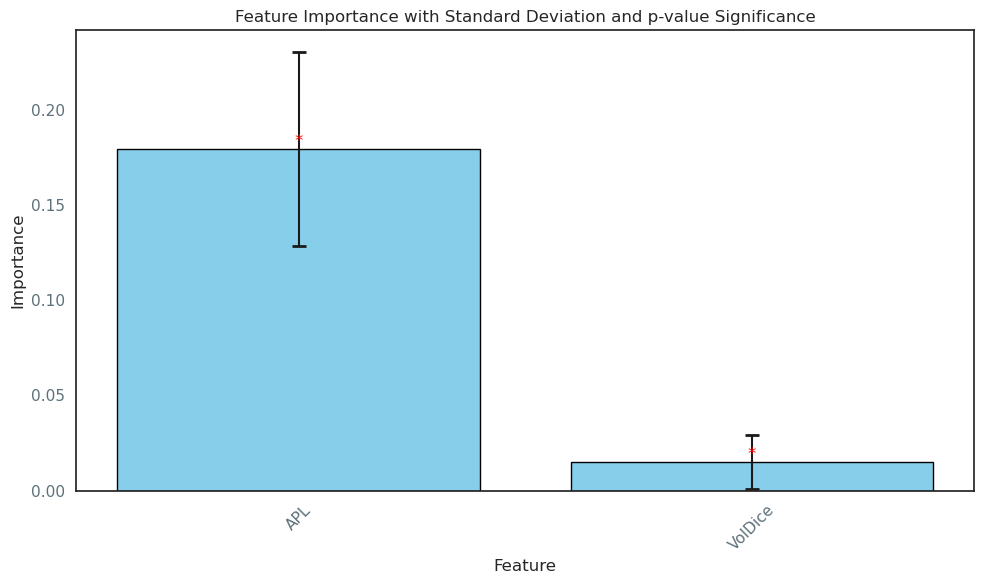

In [8]:
from AutoML.trainer import AutoMLSupervised

trainer = AutoMLSupervised(task='binary', reduction_method='mrmr')
trainer.run(data, 'Targ', exclude=['OAR', 'patient', 'MAR'], stratify_on='OAR')